<a href="https://colab.research.google.com/github/p09323028/2020f_NTU_Econometrics_I/blob/main/Textbook/CH5_Regression_with_a_Single_Regressor_Hypothesis_Tests_and_Confidence_Intervals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter 5: Regression with a Single Regressor: Hypothesis Tests and Confidence Intervals**
Author: Jinze Wu

Student Number: p09323028

前置作業:
- import 套件
- 載入資料
- 讀取資料

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [ ]:
!gdown --id '10Q4-t5L8KZjaxUqR8iGnmXx_lY9JYgSL' --output caschool.xlsx
!gdown --id '180juXX_GMJiXpo-bWy9MibYUl_S2R3kf' --output figure_5_3.xlsx

In [ ]:
caschool = pd.read_excel('caschool.xlsx')

**Decription of Data;**

dist_code -- district Code;

Read_scr  -- avg Reading Score;

Math_scr  -- avg Math Score;

County   --  county;

District -- District;

gr_span -- grade span of district;

enrl_tot -- total enrollment;

teachers -- number of teachers;

computer -- number of computers;

testscr -- avg test score (= (read_scr+math_scr)/2 );

comp_stu -- computers per student ( = computer/enrl_tot);

expn_stu -- expentitures per student;

str -- student teacher ration (teachers/enrl_tot);

el_pct -- percent of English Learners;

Meal_pct -- Percent qualifying for reduced-price lunch;

clw_pct -- Percent qualifying for CalWorks;

aving -- district average income (in $1000's);

In [ ]:
fig = pd.read_excel('figure_5_3.xlsx')

## **5.1 Testing Hypotheses About One of the Regression Coefficients**

### Equation 5.8

$\widehat{TestScore} = 698.9 - 2.28 \times STR, R^2 = 0.051, SER = 18.6$

In [ ]:
reg_5_8 = smf.ols(formula='testscr~str', data=caschool)
results_5_8 = reg_5_8.fit(cov_type='HC1')  # robust
print(results_5_8.summary())
print('SER: {:.1f}'.format(results_5_8.mse_resid**0.5))

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     19.26
Date:                Thu, 08 Apr 2021   Prob (F-statistic):           1.45e-05
Time:                        07:18:19   Log-Likelihood:                -1822.2
No. Observations:                 420   AIC:                             3648.
Df Residuals:                     418   BIC:                             3657.
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    698.9330     10.364     67.436      0.0

## **5.2 Confidence Intervals for a Regression Coefficient**

## **5.3 Regression When X Is a Binary Variable**

### Equation 5.18

$\widehat{TestScore} = 650.0 - 7.4D \times STR, R^2 = 0.037, SER = 18.7$

In [ ]:
caschool['d'] = caschool.str.apply(lambda x: 1 if x < 20 else 0)

In [ ]:
reg_5_18 = smf.ols(formula='testscr~d', data=caschool)
results_5_18 = reg_5_18.fit(cov_type='HC1')  # robust
print(results_5_18.summary())
print('SER: {:.1f}'.format(results_5_18.mse_resid**0.5))

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     16.34
Date:                Thu, 08 Apr 2021   Prob (F-statistic):           6.29e-05
Time:                        07:25:11   Log-Likelihood:                -1825.4
No. Observations:                 420   AIC:                             3655.
Df Residuals:                     418   BIC:                             3663.
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    649.9788      1.323    491.332      0.0

## **5.4 Heteroskedasticity and Homoskedasticity**

### Equation 5.23

In [ ]:
reg_5_23 = smf.ols(formula='ahe~yrseduc', data=fig)
results_5_23 = reg_5_23.fit(cov_type='HC1')
print(results_5_23.summary())

                            OLS Regression Results                            
Dep. Variable:                    ahe   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     537.1
Date:                Thu, 08 Apr 2021   Prob (F-statistic):          1.31e-108
Time:                        07:37:59   Log-Likelihood:                -10481.
No. Observations:                2731   AIC:                         2.097e+04
Df Residuals:                    2729   BIC:                         2.098e+04
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.1163      1.356     -8.938      0.0

### FIGURE 5.3

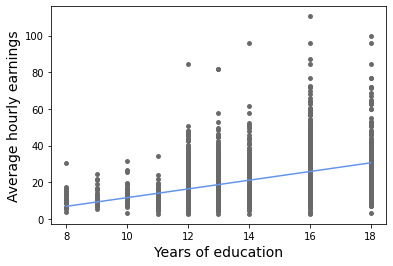

In [ ]:
b0, b1 = results_5_23.params[0], results_5_23.params[1]

plt.scatter(x=fig['yrseduc'], y=fig['ahe'], color='dimgrey', s=15)

plt.xlabel('Years of education', size=14)
plt.ylabel('Average hourly earnings', size=14)

x = np.linspace(8,18,100)
plt.plot(x, b0+b1*x, color='cornflowerblue')

plt.show()